In [1]:
from plotting_utils import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## NatureHTE Amine dataset AL results

In [2]:
farthest_al_sheet_names = ["condition_first_farth_cluster", "lowest_diff_cluster", "two_condition_farth_cluster", "random_cluster"]
condition_first_by_selection = ["condition_first_farth_cluster", "condition_first_quant_cluster", "condition_first_skip__cluster", "random_cluster"]
two_condition_by_selection = ["two_condition_farth_cluster", "two_condition_quant_cluster", "two_condition_skip__cluster", "random_cluster"]

full_data_baseline_sheets = ["full_rpc_cluster", "full_rfr_cluster"]

farthest_al_df = [pd.read_excel("performance_excels/AL/amine_6_2_2_4.xlsx", sheet_name=x) for x in farthest_al_sheet_names]
condition_first_selection_df = [pd.read_excel("performance_excels/AL/amine_6_2_2_4.xlsx", sheet_name=x) for x in condition_first_by_selection]
two_condition_selection_df = [pd.read_excel("performance_excels/AL/amine_6_2_2_4.xlsx", sheet_name=x) for x in two_condition_by_selection]
full_data_dfs = [pd.read_excel("performance_excels/AL/amine_6_2_2_4.xlsx", sheet_name=x) for x in full_data_baseline_sheets]

### Comparison between different AL strategies with farthest substrate selection

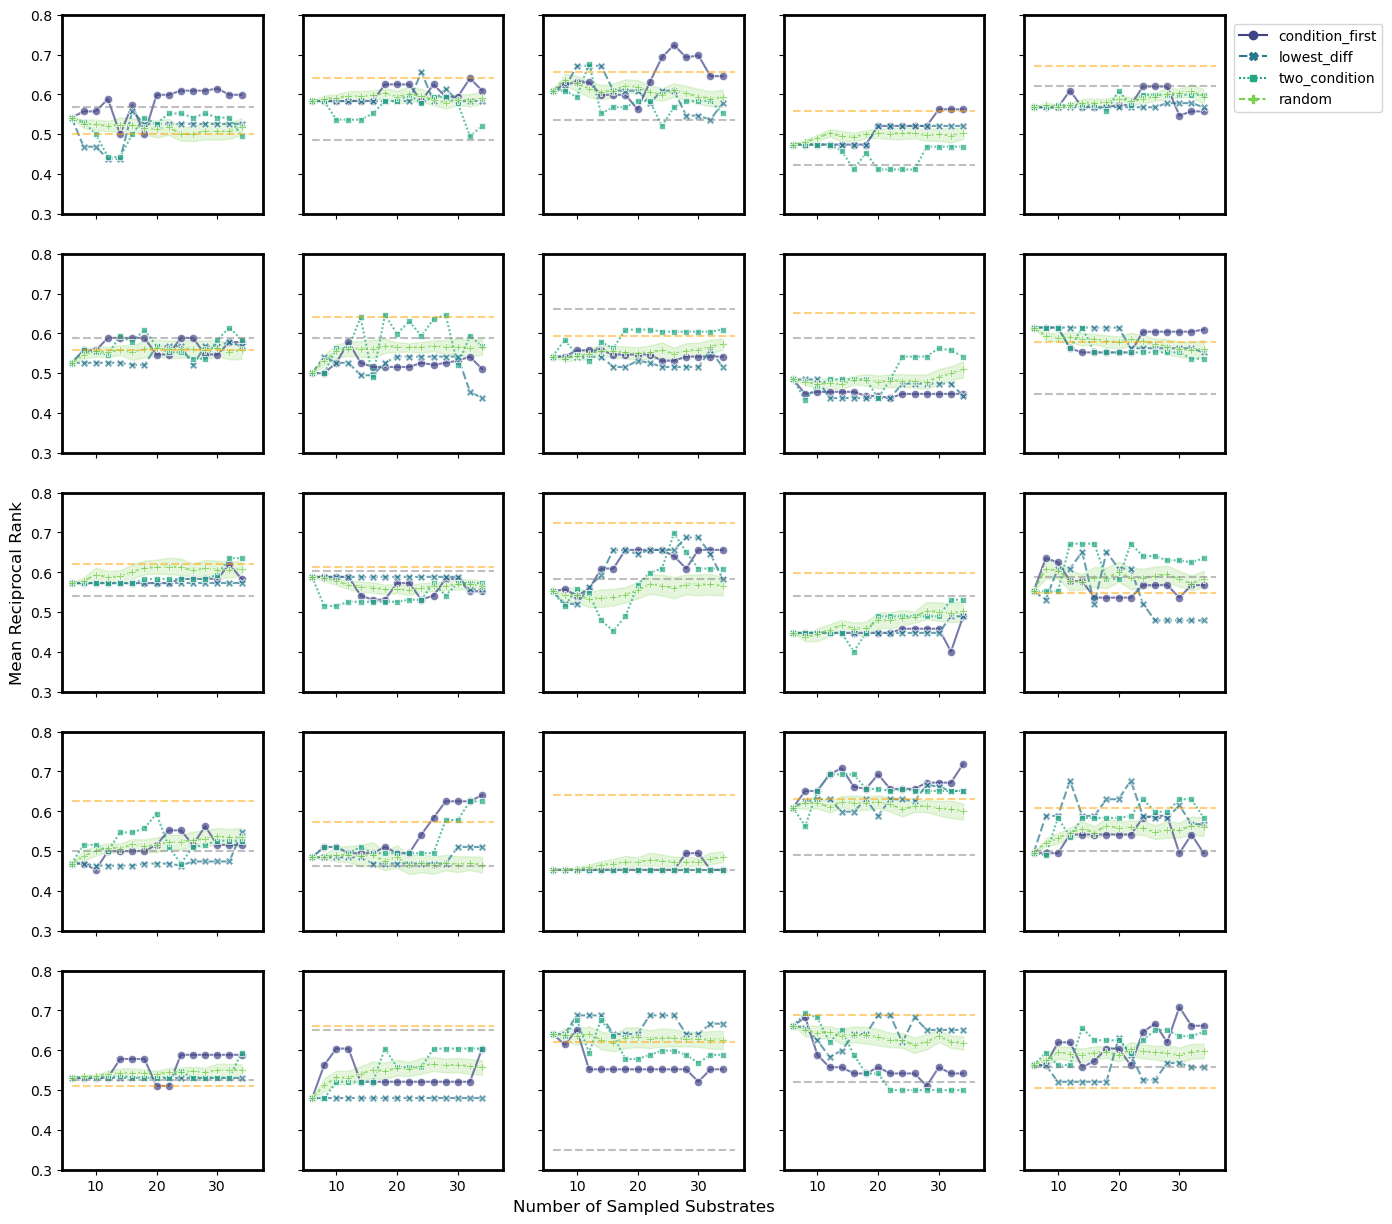

In [3]:
al_df = pd.concat(farthest_al_df, ignore_index=True)
strategy_col = []
for i, (strategy, df) in enumerate(zip(farthest_al_sheet_names, farthest_al_df)) :
    if i in [0,2] :
        strategy_name = strategy[:-14]
    else :
        strategy_name = strategy[:-8]
    strategy_col.extend([strategy_name]*df.shape[0])
al_df["Strategy"] = strategy_col

AL_trellis(al_df, full_data_dfs[0], full_data_dfs[1], 0.3, 0.8)

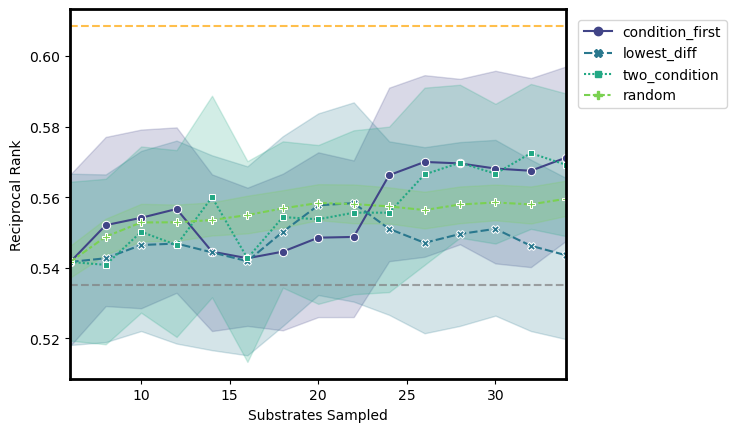

In [4]:
AL_average(al_df, full_data_dfs[0], full_data_dfs[1], 6, 34)

### Within "Condition First", compare different substrate selection strategies

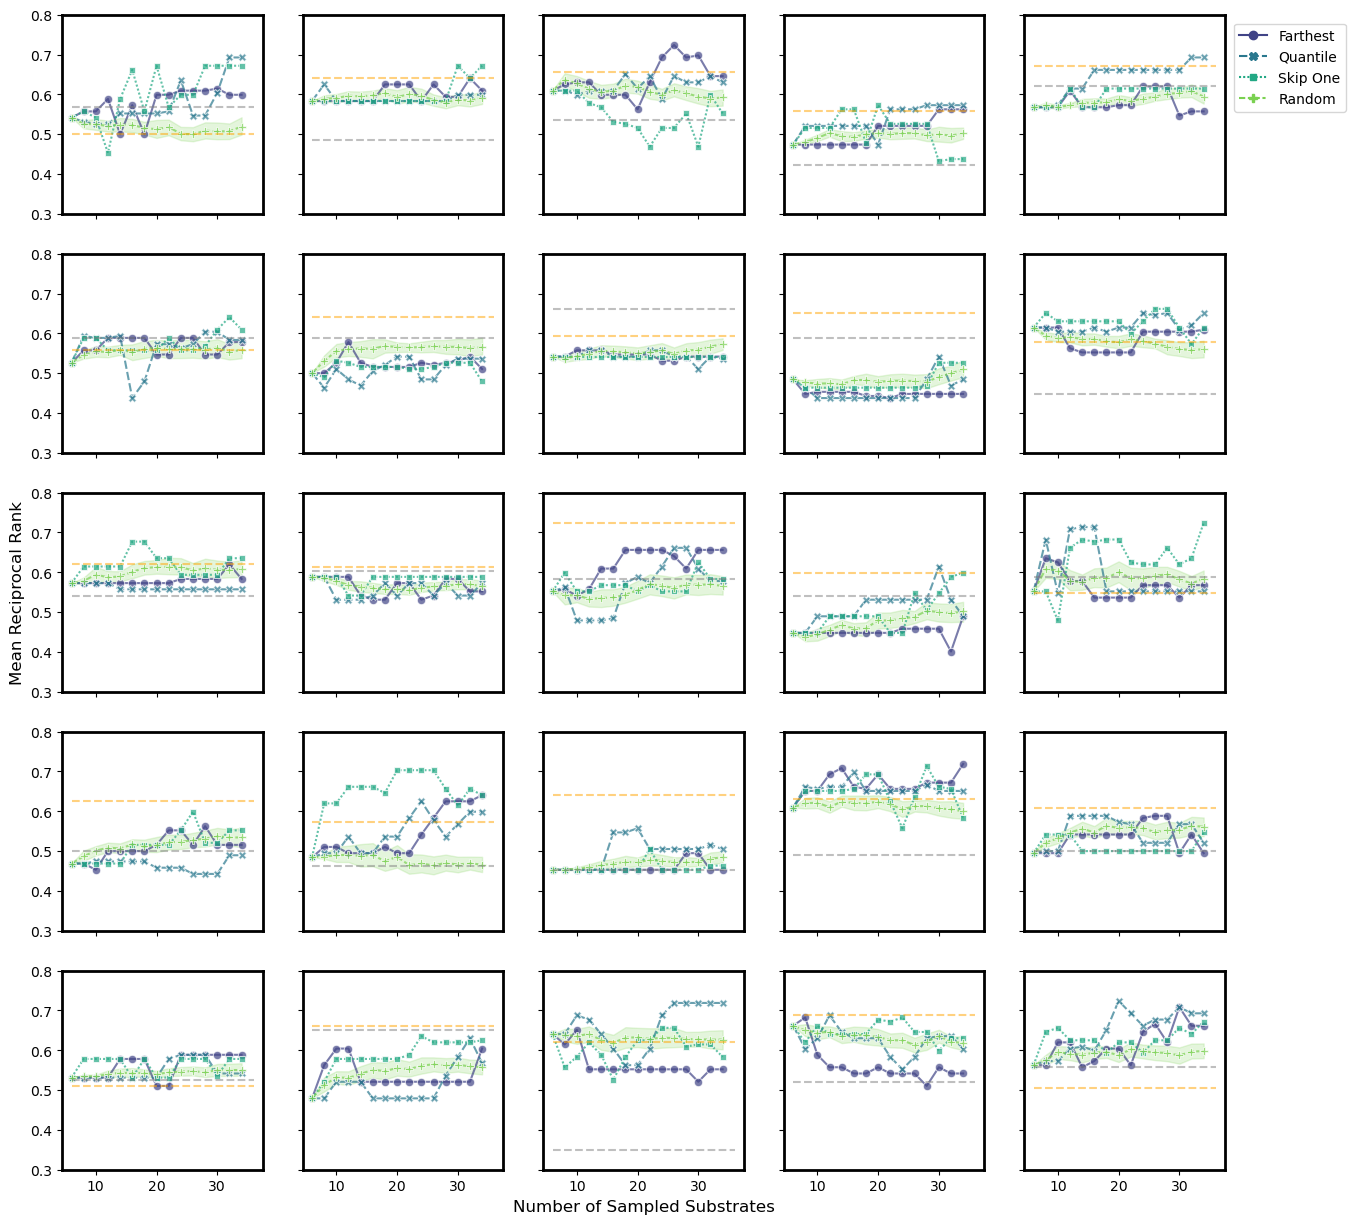

In [5]:
cond_first_al_df = pd.concat(condition_first_selection_df, ignore_index=True)
strategy_col = []
for strategy, df in zip(["Farthest", "Quantile", "Skip One", "Random"], condition_first_selection_df) :
    strategy_col.extend([strategy]*df.shape[0])
cond_first_al_df["Strategy"] = strategy_col

AL_trellis(cond_first_al_df, full_data_dfs[0], full_data_dfs[1], 0.3, 0.8)

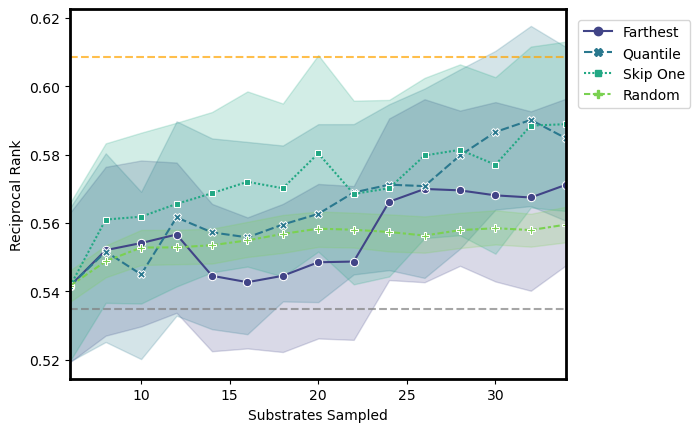

In [6]:
AL_average(cond_first_al_df, full_data_dfs[0], full_data_dfs[1], 6, 34)

### Within "Two pairs conditions", compare different substrate selection strategies

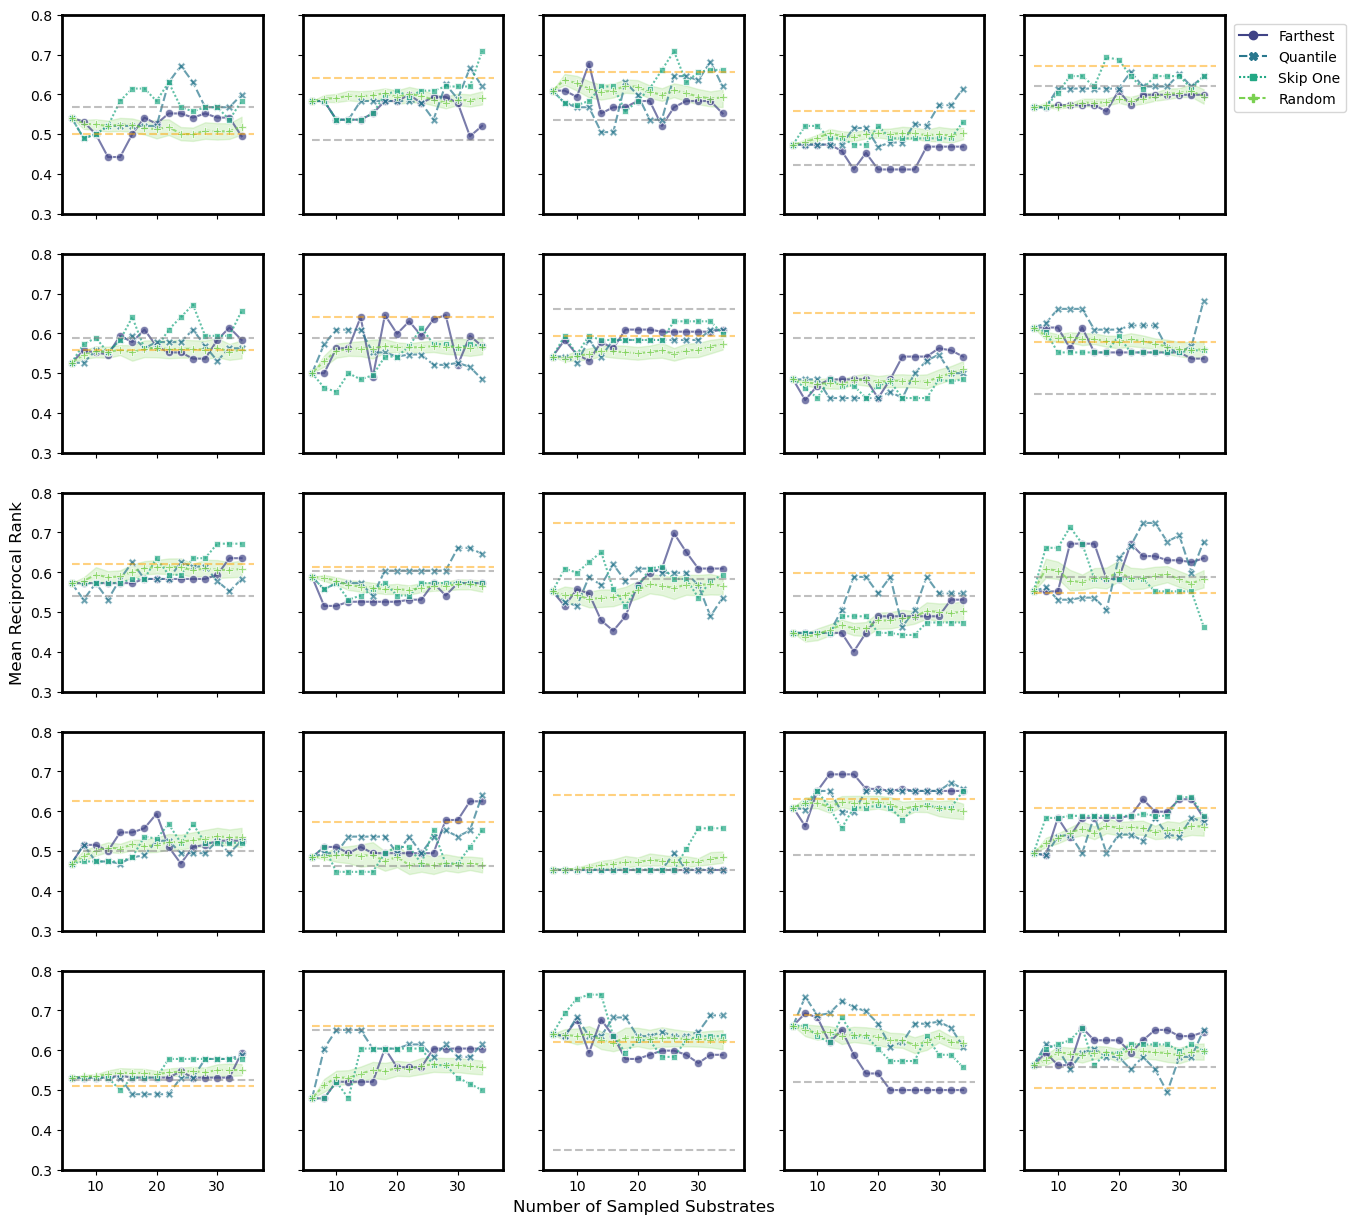

In [7]:
two_cond_al_df = pd.concat(two_condition_selection_df, ignore_index=True)
strategy_col = []
for strategy, df in zip(["Farthest", "Quantile", "Skip One", "Random"], two_condition_selection_df) :
    strategy_col.extend([strategy]*df.shape[0])
two_cond_al_df["Strategy"] = strategy_col

AL_trellis(two_cond_al_df, full_data_dfs[0], full_data_dfs[1], 0.3, 0.8)

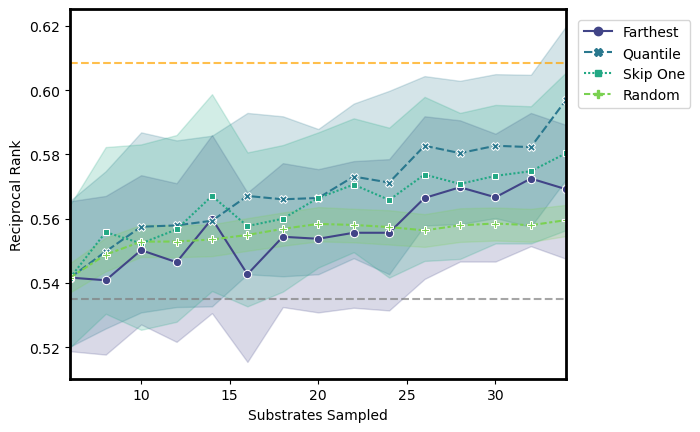

In [8]:
AL_average(two_cond_al_df, full_data_dfs[0], full_data_dfs[1], 6, 34)

### Comparing again

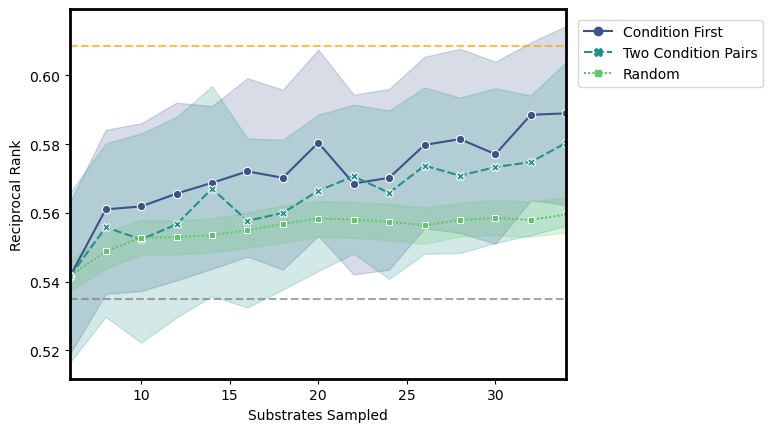

In [9]:
skip_one_sheets = ["condition_first_skip__cluster", "two_condition_skip__cluster",  "random_cluster"]
skip_one_df = [pd.read_excel("performance_excels/AL/amine_6_2_2_4.xlsx", sheet_name=x) for x in skip_one_sheets]

skip_al_df = pd.concat(skip_one_df, ignore_index=True)
strategy_col = []
for strategy, df in zip(["Condition First", "Two Condition Pairs", "Random"], skip_one_df) :
    strategy_col.extend([strategy]*df.shape[0])
skip_al_df["Strategy"] = strategy_col

AL_average(skip_al_df, full_data_dfs[0], full_data_dfs[1], 6, 34)

### Comparing sampling of different number of substrates and reaction conditions

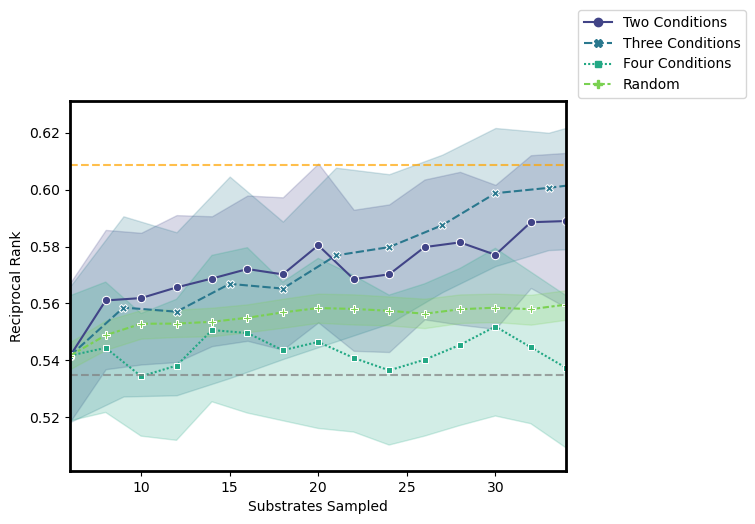

In [25]:
all_cond_df = pd.read_excel("performance_excels/AL/amine_6_4_1_4.xlsx")
adjusted_subs_sampled = []
for i, row in all_cond_df.iterrows():
    adjusted_subs_sampled.append(2*row["Substrates Sampled"] - 6)
all_cond_df["Substrates Sampled"] = adjusted_subs_sampled

three_cond_df = pd.read_excel("performance_excels/AL/amine_6_3_2_4.xlsx", sheet_name="condition_first_quant_cluster")
adjusted_subs_sampled = []
for i, row in three_cond_df.iterrows():
    adjusted_subs_sampled.append(6+int(1.5*(row["Substrates Sampled"] - 6)))
three_cond_df["Substrates Sampled"] = adjusted_subs_sampled

dfs_to_concat = [skip_one_df[0], three_cond_df, all_cond_df, skip_one_df[2]]
concat_all_cond_df = pd.concat(dfs_to_concat)

all_cond_concat_df = pd.concat(dfs_to_concat, ignore_index=True)
strategy_col = []
for strategy, df in zip(["Two Conditions", "Three Conditions", "Four Conditions", "Random"], dfs_to_concat) :
    strategy_col.extend([strategy]*df.shape[0])
all_cond_concat_df["Strategy"] = strategy_col


AL_average(all_cond_concat_df, full_data_dfs[0], full_data_dfs[1], 6, 34)

#### Selecting 2 substrates & 3 conditions

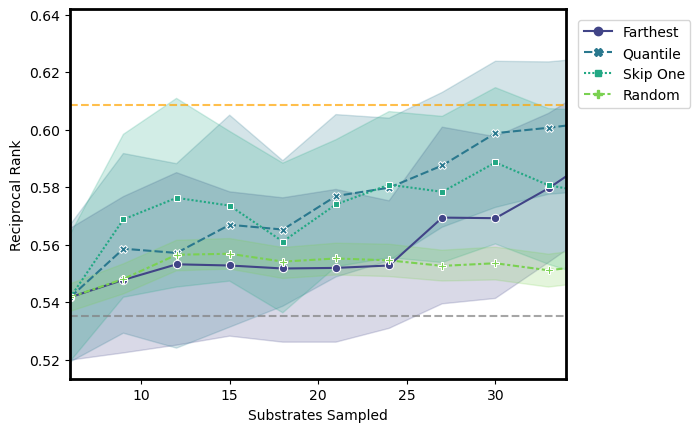

In [24]:
three_condition_first_selection_df = [
    pd.read_excel("performance_excels/AL/amine_6_3_2_4.xlsx", sheet_name=x) 
    for x in condition_first_by_selection
]
three_cond_al_df = pd.concat(three_condition_first_selection_df, ignore_index=True)
adjusted_subs_sampled = []
for i, row in three_cond_al_df.iterrows():
    adjusted_subs_sampled.append(6+int(1.5*(row["Substrates Sampled"] - 6)))
three_cond_al_df["Substrates Sampled"] = adjusted_subs_sampled
strategy_col = []
for strategy, df in zip(["Farthest", "Quantile", "Skip One", "Random"], three_condition_first_selection_df) :
    strategy_col.extend([strategy]*df.shape[0])
three_cond_al_df["Strategy"] = strategy_col

AL_average(three_cond_al_df, full_data_dfs[0], full_data_dfs[1], 6, 34)

# Science Fragment data AL results

In [2]:
farthest_al_sheet_names = ["condition_first_farth_cluster", "lowest_diff_farth_cluster", "two_condition_farth_cluster", "random_cluster"]
condition_first_by_selection = ["condition_first_farth_cluster", "condition_first_quant_cluster", "condition_first_skip__cluster", "random_cluster"]
two_condition_by_selection = ["two_condition_farth_cluster", "two_condition_quant_cluster", "two_condition_skip__cluster", "random_cluster"]

farthest_al_df = [pd.read_excel("performance_excels/AL/fragment_24_2_2_4.xlsx", sheet_name=x) for x in farthest_al_sheet_names]
condition_first_selection_df = [pd.read_excel("performance_excels/AL/fragment_24_2_2_4.xlsx", sheet_name=x) for x in condition_first_by_selection]
two_condition_selection_df = [pd.read_excel("performance_excels/AL/fragment_24_2_2_4.xlsx", sheet_name=x) for x in two_condition_by_selection]
full_rpc_df = pd.read_excel("performance_excels/AL/fragment_24_2_2_4.xlsx", sheet_name="full_rpc_cluster")

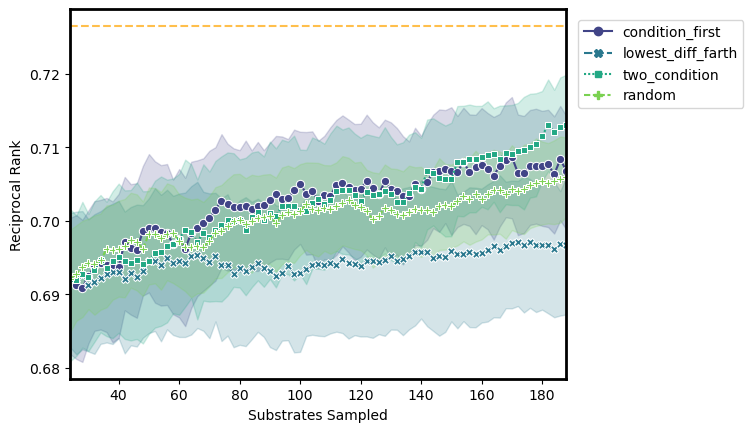

In [3]:
al_df = pd.concat(farthest_al_df, ignore_index=True)
strategy_col = []
for i, (strategy, df) in enumerate(zip(farthest_al_sheet_names, farthest_al_df)) :
    if i in [0,2] :
        strategy_name = strategy[:-14]
    else :
        strategy_name = strategy[:-8]
    strategy_col.extend([strategy_name]*df.shape[0])
al_df["Strategy"] = strategy_col

AL_average(al_df, full_rpc_df, None, 24, 188)

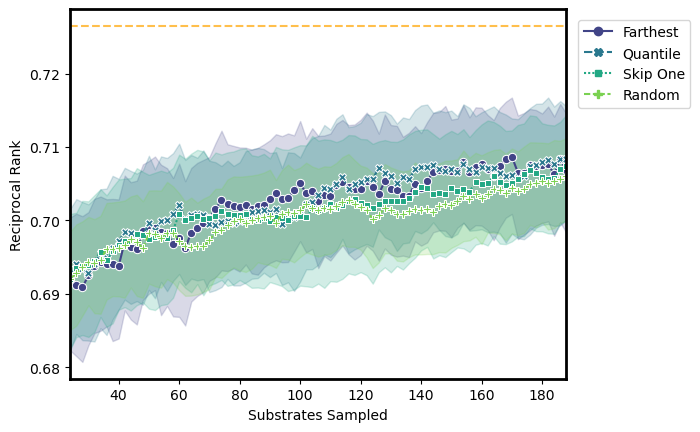

In [4]:
cond_first_al_df = pd.concat(condition_first_selection_df, ignore_index=True)
strategy_col = []
for strategy, df in zip(["Farthest", "Quantile", "Skip One", "Random"], condition_first_selection_df) :
    strategy_col.extend([strategy]*df.shape[0])
cond_first_al_df["Strategy"] = strategy_col

AL_average(cond_first_al_df, full_rpc_df, None, 24, 188)

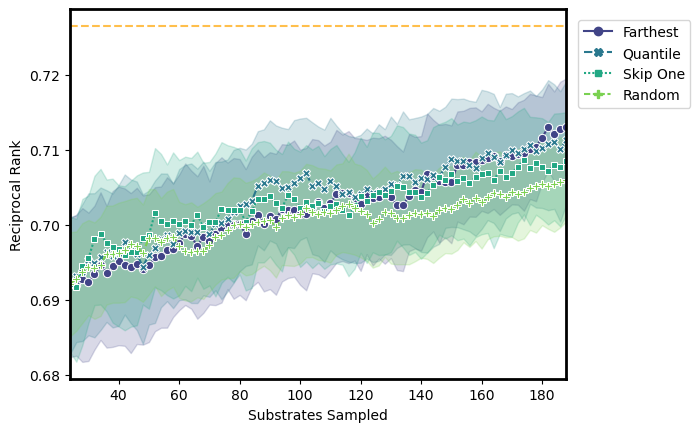

In [5]:
two_cond_al_df = pd.concat(two_condition_selection_df, ignore_index=True)
strategy_col = []
for strategy, df in zip(["Farthest", "Quantile", "Skip One", "Random"], two_condition_selection_df) :
    strategy_col.extend([strategy]*df.shape[0])
two_cond_al_df["Strategy"] = strategy_col

AL_average(two_cond_al_df, full_rpc_df, None, 24, 188)